In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../data/konacna_tabela_normalizovana.csv')

In [3]:
df.isna().sum().sum()

0

In [4]:
X = df.drop(['ID', 'Tip', 'Pocetak', 'Kraj'], axis=1)
y = df['Tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [5]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')

In [6]:
y_train = y_train['Tip']
y_train.shape

(607,)

In [7]:
y_test = y_test['Tip']
y_test.shape

(152,)

In [8]:
class_names = y_train.unique()
class_names

array(['C', 'N', 'R', 'K', 'P'], dtype=object)

In [9]:
class_value_counts = y_train.value_counts()
class_value_counts

Tip
C    338
N    110
R     75
K     70
P     14
Name: count, dtype: int64

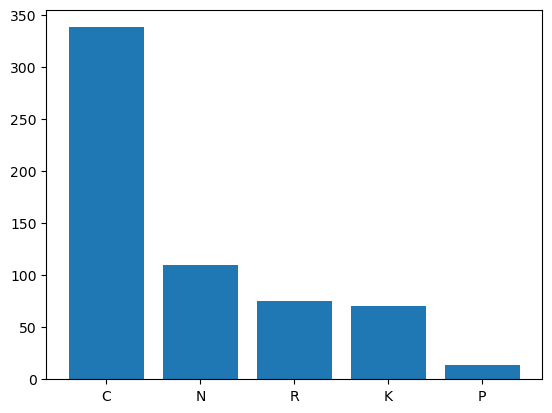

In [10]:
plt.bar(class_names, class_value_counts)
plt.savefig('balansiranost_klasa.png')

In [18]:
sm = SMOTE(random_state=42, k_neighbors=5)

In [19]:
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

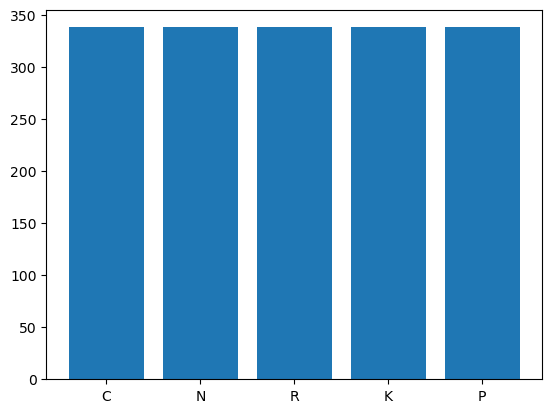

In [20]:
plt.bar(y_train_SMOTE.unique(), y_train_SMOTE.value_counts())
plt.savefig('balansiranost_klasa_SMOTE.png')

In [21]:
count_class_C = y_train.value_counts().iloc[0]
count_class_N = y_train.value_counts().iloc[1]
count_class_R = y_train.value_counts().iloc[2]
count_class_K = y_train.value_counts().iloc[3]
count_class_P = y_train.value_counts().iloc[4]

ratio_C = count_class_P/count_class_C
ratio_N = count_class_P/count_class_N
ratio_R = count_class_P/count_class_R
ratio_K = count_class_P/count_class_K

class_weight = {'C':ratio_C, 'N':ratio_N, 'R':ratio_R, 'K':ratio_K, 'P':1}
class_weight

{'C': 0.04142011834319527,
 'N': 0.12727272727272726,
 'R': 0.18666666666666668,
 'K': 0.2,
 'P': 1}

In [22]:
%store class_weight

Stored 'class_weight' (dict)


In [23]:
%store X_train_SMOTE

Stored 'X_train_SMOTE' (DataFrame)


In [24]:
%store y_train_SMOTE

Stored 'y_train_SMOTE' (Series)
